# <center><font color = green> **Neural Networks** </center></color>

# Content

1. [Starting with tensorflow](#tensor)
- [Functional API](#func)
- [Dynamic API](#dynamic)
- Saving the model
- [Tensorboard API](#tensorboard)
- [Hyperparameter tuning](#tuning)
- Vanishing/Exploding Gradients

## Logical Computations with Neurons
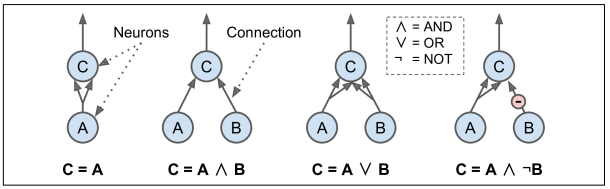

- The first network on the left is simply the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A), but if neuron A is off, then neuron C is off as well.
- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

[playground](https://playground.tensorflow.org)

## Perceptron and multilayer network
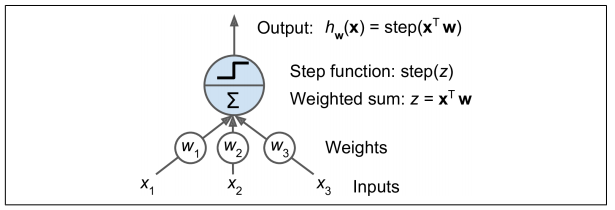

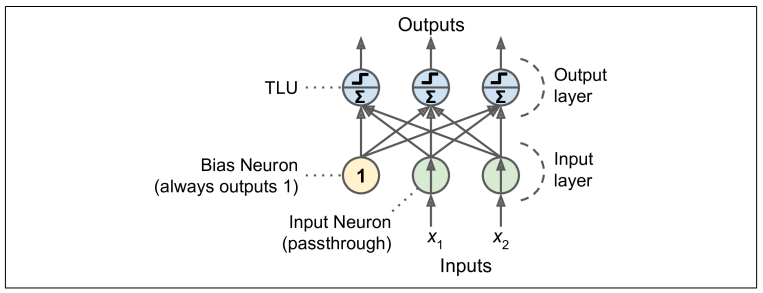

Perceptron training rule with weight update
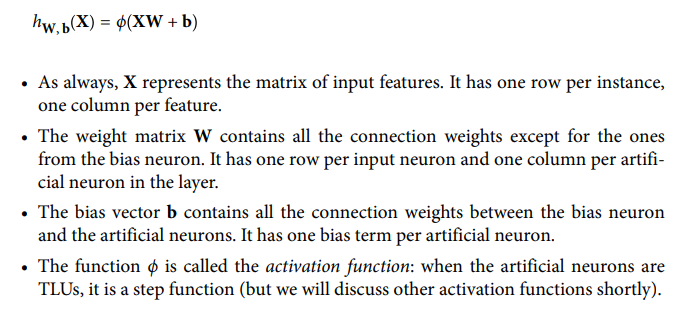

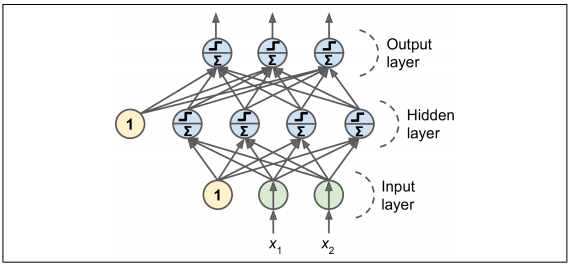

## Backpropagation

It handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

• Each mini-batch is passed to the network’s input layer, which just sends it to the
first hidden layer. The algorithm then computes the output of all the neurons in
this layer (for every instance in the mini-batch). The result is passed on to the
next layer, its output is computed and passed to the next layer, and so on until we
get the output of the last layer, the output layer. This is the forward pass: it is
exactly like making predictions, except all intermediate results are preserved
since they are needed for the backward pass.

• Next, the algorithm measures the network’s output error (i.e., it uses a loss func‐
tion that compares the desired output and the actual output of the network, and
returns some measure of the error).

• Then it computes how much each output connection contributed to the error.
This is done analytically by simply applying the chain rule (perhaps the most fun‐
damental rule in calculus), which makes this step fast and precise.

• The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule—and so on until
the algorithm reaches the input layer. As we explained earlier, this reverse pass
efficiently measures the error gradient across all the connection weights in the
network by propagating the error gradient backward through the network (hence the name of the algorithm).

• Finally, the algorithm performs a Gradient Descent step to tweak all the connec‐
tion weights in the network, using the error gradients it just computed.

In order for this algorithm to work properly, the authors made a key change to the
MLP’s architecture: they replaced the step function with the logistic function, σ(z) =
1 / (1 + exp(–z)). This was essential because the step function contains only flat seg‐
ments, so there is no gradient to work with (Gradient Descent cannot move on a flat
surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just
the logistic function. Two other popular activation functions are:

**The hyperbolic tangent function tanh(z)** = 2σ(2z) – 1
Just like the logistic function it is S-shaped, continuous, and differentiable, but its
output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic func‐
tion), which tends to make each layer’s output more or less centered around 0 at
the beginning of training. This often helps speed up convergence.

**The Rectified Linear Unit function: ReLU(z)** = max(0, z)
It is continuous but unfortunately not differentiable at z = 0 (the slope changes
abruptly, which can make Gradient Descent bounce around), and its derivative is
0 for z < 0. However, in practice it works very well and has the advantage of being


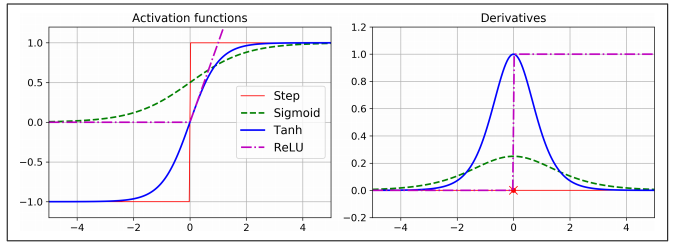

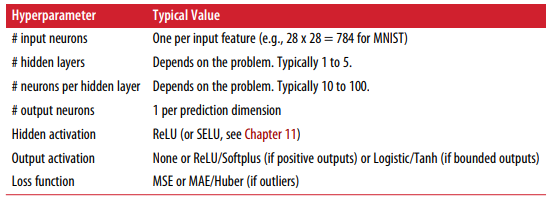

## Classification NN
The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to one (which is required if the classes are exclusive). This is called multiclass classification.
- cross-entropy is a good choice for loss function
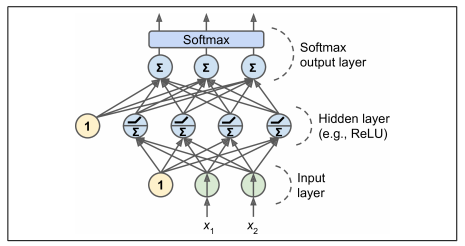

## Tensorflow
## Main imports  <a name="tensor"></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

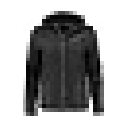

In [5]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## MLP Classification

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #prerpocessing the data and transforming to 1D shape
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


#### The above code in detail:
• The first line creates a Sequential model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, con‐
nected sequentially. This is called the sequential API.

• Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is simply to convert each input image into a 1D array: if it receives input data
X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is
just there to do some simple preprocessing. Since it is the first layer in the model,
you should specify the input_shape: this does not include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting shape=[28,28].

• Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐
tion function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data

• Next we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.

• Finally, we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).

In [8]:
#another way to add the model
model_seq = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

### Activation function and initialization change
Specifying activation="relu" is equivalent to activation=keras.activations.relu. Other **activation functions are
available in the keras.activations package. See https://keras.io/activations/ for the full list.**

 If you ever want to use a **different initialization** method, you can set **kernel_initializer** (kernel is another name for the  matrix of connection weights) or **bias_initializer** when creating the layer.  https://keras.io/initializers/

In [9]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers, model.layers[1].name

([<tensorflow.python.keras.layers.core.Flatten at 0x1c5e38fa320>,
 'dense')

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, biases = hidden1.get_weights()

In [13]:
weights.shape, weights[0][:3]

((784, 300), array([ 0.00648659, -0.07238626, -0.03221975], dtype=float32))

After a model is created, you must call its compile() method to specify the loss func‐
tion and the optimizer to use. Optionally, you can also specify a list of extra metrics to
compute during training and evaluation:

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="sgd",
                 metrics=["accuracy"])

If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, you can use the **keras.utils.to_categorical()**
function. To go the other way round, you can just use the np.arg
max() function with axis=1.

Instead of passing a validation set using the **validation_data**
argument, you could instead set validation_split to the ratio of
the training set that you want Keras to use for validation (e.g., 0.1).

If the training set was very skewed, with some classes being overrepresented and oth‐
ers underrepresented, it would be useful to set the **class_weight** argument when
calling the fit(), giving a larger weight to underrepresented classes, and a
lower weight to overrepresented classes. 

If you need per-instance weights instead, you can set the **sample_weight** argument (it supersedes class_weight).

In [15]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.7004 - accuracy: 0.7699 - val_loss: 0.5069 - val_accuracy: 0.8272
Epoch 2/10
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4807 - accuracy: 0.8332 - val_loss: 0.4460 - val_accuracy: 0.8502
Epoch 3/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4403 - accuracy: 0.8461 - val_loss: 0.4577 - val_accuracy: 0.8418
Epoch 4/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4131 - accuracy: 0.8547 - val_loss: 0.3981 - val_accuracy: 0.8672
Epoch 5/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3947 - accuracy: 0.8611 - val_loss: 0.3756 - val_accuracy: 0.8724
Epoch 6/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3799 - accuracy: 0.8670 - val_loss: 0.3711 - val_accuracy: 0.8718
Epoch 7/10
55000/55000 [==============================] -

In [16]:
history.params, history.history.keys()

({'batch_size': 32,
  'epochs': 10,
  'steps': 1719,
  'samples': 55000,
  'verbose': 0,
  'do_validation': True,
  'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']},
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

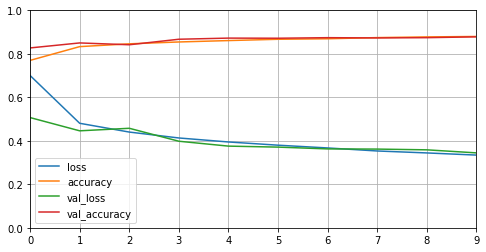

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
y_test.shape

(10000,)

In [19]:
# Evaluation on the test set
model.evaluate(X_test, y_test, verbose = 0)

[0.38116084876060485, 0.8593]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2) # showing the probability for each class

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.91],
       [0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
model.predict_classes(X_new), np.array(class_names)[model.predict_classes(X_new)]

(array([9, 2, 1], dtype=int64),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

# Functional API <a name="func"></a>
Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).

In [22]:
#Loading california housing set
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

• First, we need to create an Input object. This is needed because we may have
multiple inputs, as we will see later.

• Next, we create a Dense layer with 30 neurons and using the ReLU activation
function. As soon as it is created, notice that we call it like a function, passing it
the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together, no actual data is being processed yet.

• We then create a second hidden layer, and again we use it as a function. Note
however that we pass it the output of the first hidden layer.

• Next, we create a Concatenate() layer, and once again we immediately use it like
a function, to concatenate the input and the output of the second hidden layer
(you may prefer the keras.layers.concatenate() function, which creates a Con
catenate layer and immediately calls it with the given inputs).

• Then we create the output layer, with a single neuron and no activation function,
and we call it like a function, passing it the result of the concatenation.

• Lastly, we create a Keras Model, specifying which inputs and outputs to use.
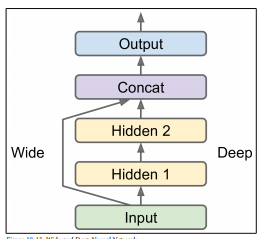

In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_7[0][0]                

In [26]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),  verbose =0)
mse_test = model.evaluate(X_test, y_test, verbose =0)
mse_test

0.4045565500277881

### With different subset of inputs

In [27]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [28]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test, verbose = 0)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 117us/sample - loss: 1.7567 - val_loss: 0.9440
Epoch 2/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.7585 - val_loss: 0.6631
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.6576 - val_loss: 0.6012
Epoch 4/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6030 - val_loss: 0.5865
Epoch 5/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5667 - val_loss: 0.5385
Epoch 6/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5393 - val_loss: 0.5257
Epoch 7/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5191 - val_loss: 0.4957
Epoch 8/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5016 - val_loss: 0.4794
Epoch 9/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4910 - val_

## Dynamic models  <a name="dynamic"></a>
Simply subclass the Model class, create the layers you need in the constructor, and use
them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent
model to the one we just built with the Functional API. You can then compile it, evaluate it and use it to make predictions.

 when you call the summary() method, you only get a list of layers, without any
information on how they are connected to each other. 

In [29]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [30]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test), verbose = 0)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 138us/sample - loss: 2.7573 - output_1_loss: 2.2772 - output_2_loss: 7.0685 - val_loss: 1.8879 - val_output_1_loss: 1.4410 - val_output_2_loss: 5.9065
Epoch 2/10
11610/11610 [==============================] - 1s 52us/sample - loss: 1.1691 - output_1_loss: 0.8232 - output_2_loss: 4.2813 - val_loss: 0.9378 - val_output_1_loss: 0.7034 - val_output_2_loss: 3.0460
Epoch 3/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.8572 - output_1_loss: 0.6710 - output_2_loss: 2.5319 - val_loss: 0.7638 - val_output_1_loss: 0.6177 - val_output_2_loss: 2.0771
Epoch 4/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.7302 - output_1_loss: 0.6135 - output_2_loss: 1.7787 - val_loss: 0.6971 - val_output_1_loss: 0.5817 - val_output_2_loss: 1.7347
Epoch 5/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.6649 - output_1_loss: 0

## Saving the model

In [31]:
model_seq.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
model_seq.save("my_keras_model_test.h5")

In [32]:
model_loaded = keras.models.load_model("my_keras_model_test.h5")

## Cloning a model and its parameters

### Saving model during training using callbacks
The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call during training at the start and end of training, at the start and end
of each epoch and even before and after processing each batch. For example, the Mod
elCheckpoint callback saves checkpoints of your model at regular intervals during
training, by default at the end of each epoch:

Moreover, if you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint. In this case, it will only
save your model when its performance on the validation set is the best so far. you do not need to worry about training for too long and overfitting the training
set: simply restore the last model saved after training, and this will be the best model
on the validation set. 

There are many other callbacks available in the keras.callbacks
package. See https://keras.io/callbacks/.

In [33]:
keras.backend.clear_session()

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test, verbose = 0)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 79us/sample - loss: 1.7731 - val_loss: 0.9294
Epoch 2/10
11610/11610 [==============================] - ETA: 0s - loss: 0.764 - 1s 56us/sample - loss: 0.7635 - val_loss: 0.6857
Epoch 3/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6619 - val_loss: 0.6480
Epoch 4/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6173 - val_loss: 0.5939
Epoch 5/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5842 - val_loss: 0.5741
Epoch 6/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5554 - val_loss: 0.5235
Epoch 7/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5326 - val_loss: 0.5085
Epoch 8/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5141 - val_loss: 0.4875
Epoch 9/10
11610/11610 [==============================] - 1s 47us/sampl

**EarlyStopping** callback. It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model. You can combine both callbacks to both save checkpoints of
your model (in case your computer crashes), and actually interrupt training early
when there is no more progress (to avoid wasting time and resources)

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test, verbose = 0)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 117us/sample - loss: 0.4722 - val_loss: 0.4562
Epoch 2/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4622 - val_loss: 0.4617
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4530 - val_loss: 0.4349
Epoch 4/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4451 - val_loss: 0.4304
Epoch 5/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4383 - val_loss: 0.4673
Epoch 6/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4318 - val_loss: 0.4464
Epoch 7/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4257 - val_loss: 0.4389
Epoch 8/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4209 - val_loss: 0.4573
Epoch 9/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.41

# TensorBoard <a name="tensorboard"></a>
You must modify your program so that it outputs the data you want to visualize to special binary log files called *event files*. Each binary data record is called a *summary*. 

The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize
live data (with a short delay), such as the learning curves during training. In general,
you want to point the TensorBoard server to a root log directory, and configure your
program so that it writes to a different subdirectory every time it runs. This way, the
same TensorBoard server instance will allow you to visualize and compare data from
multiple runs of your program, without getting everything mixed up.

In [37]:
import os

In [38]:
root_logdir = os.path.join(os.curdir, "my_logs")
root_logdir

'.\\my_logs'

Give a specific name to the run files

In [39]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2019_10_30-10_15_12'

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [41]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 90us/sample - loss: 1.5206 - val_loss: 0.9300
Epoch 2/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.7110 - val_loss: 0.6797
Epoch 3/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.6423 - val_loss: 0.6603
Epoch 4/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5990 - val_loss: 0.5971
Epoch 5/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5647 - val_loss: 0.5424
Epoch 6/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5360 - val_loss: 0.5204
Epoch 7/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5133 - val_loss: 0.4910
Epoch 8/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4949 - val_loss: 0.4721
Epoch 9/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4788 - val_l

Next you need to start the TensorBoard server. If you installed TensorFlow within a
virtualenv, you should activate it. Next, run the following command at the root of the
project (or from anywhere else as long as you point to the appropriate log directory).
If your shell cannot find the tensorboard script, then you must update your PATH
environment variable so that it contains the directory in which the script was
installed (alternatively, you can just replace tensorboard with python3 -m tensor
board.main).

$ tensorboard --logdir=./my_logs --port=6006

TensorBoard 2.0.0 at http://mycomputer.local:6006 (Press CTRL+C to quit)

Finally, open up a web browser to http://localhost:6006. You should see TensorBoard’s
web interface. Click on the SCALARS tab to view the learning curves.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [42]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 13496), started 17:52:52 ago. (Use '!kill 13496' to kill it.)

## Hyperparameter tuning <a name="tuning"></a>

 One solution is a gridsearch like technique. Simply try many combinations of hyperparameters and see which
one works best on the validation set. 


This function creates a simple Sequential model for univariate regression (only one
output neuron), with the given input shape and the given number of hidden layers
and neurons, and it compiles it using an SGD optimizer configured with the given
learning rate. The options dict is used to ensure that the first layer is properly given
the input shape (note that if n_hidden=0, the first layer will be the output layer). It is
good practice to provide reasonable defaults to as many hyperparameters as you can,
as Scikit-Learn does.

In [43]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

The KerasRegressor object is a thin wrapper around the Keras model built using
build_model(). Since we did not specify any hyperparameter when creating it, it will
just use the default hyperparameters we defined in build_model(). Now we can use
this object like a regular Scikit-Learn regressor: we can train it using its fit()
method, then evaluate it using its score() method, and use it to make predictions
using its predict() method. Note that any extra parameter you pass to the fit()
method will simply get passed to the underlying Keras model. Also note that the
score will be the opposite of the MSE because Scikit-Learn wants scores, not losses

In [44]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

This just evaluates one model for demonstration porpuse:

In [45]:
keras_reg.fit(X_train, y_train, epochs=50,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 75us/sample - loss: 1.5565 - val_loss: 20.8896
Epoch 2/50
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8075 - val_loss: 1.2883
Epoch 3/50
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5888 - val_loss: 0.5135
Epoch 4/50
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5242 - val_loss: 0.5104
Epoch 5/50
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4923 - val_loss: 0.4453
Epoch 6/50
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4706 - val_loss: 0.4297
Epoch 7/50
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4576 - val_loss: 0.4147
Epoch 8/50
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4467 - val_loss: 0.4087
Epoch 9/50
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4420 - val_

In [46]:
mse_test = keras_reg.score(X_test, y_test, verbose = 0)
mse_test

-0.35158230597658674

In [47]:
y_pred = keras_reg.predict(X_test[0:3])
y_pred, y_test[0:3]

(array([0.6731894, 1.7063141, 4.0048265], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

### Randomized Search
Evaluating many models to select the best performace:

In [48]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2],
    "n_neurons": np.arange(1, 100)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=3, cv=3, verbose=1)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid),  #t RandomizedSearchCV uses K-fold cross-validation, so it does not use X_valid and y_valid. These are just used for early stopping.
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Train on 7740 samples, validate on 3870 samples
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 101us/sample - loss: 1.5272 - val_loss: 17.1312
Epoch 2/50
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8499 - val_loss: 15.7599
Epoch 3/50
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7096 - val_loss: 0.8054
Epoch 4/50
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5303 - val_loss: 0.4738
Epoch 5/50
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4868 - val_loss: 0.4523
Epoch 6/50
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4610 - val_loss: 0.4203
Epoch 7/50
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4443 - val_loss: 0.4125
Epoch 8/50
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4322 - val_loss: 0.4079
Epoch 9/50
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4240 - val_loss: 0.3994
Epoch 10/50
7740/7740 [==============================] - 0s 49u

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


11610/11610 [==============================] - 1s 101us/sample - loss: 1.1820 - val_loss: 2.5845
Epoch 2/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5889 - val_loss: 0.5034
Epoch 3/50
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5134 - val_loss: 0.4577
Epoch 4/50
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4714 - val_loss: 0.4652
Epoch 5/50
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4454 - val_loss: 0.4448
Epoch 6/50
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4268 - val_loss: 0.5000
Epoch 7/50
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4142 - val_loss: 0.4570
Epoch 8/50
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4047 - val_loss: 0.5255
Epoch 9/50
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3976 - val_loss: 0.4675
Epoch 10/50
11610/11610 [======================

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C5876E5C88>,
                   iid='warn', n_iter=3, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [49]:
rnd_search_cv.best_params_

{'n_neurons': 16, 'n_hidden': 2}

In [50]:
rnd_search_cv.best_score_

-0.36410264468829656

In [52]:
model.evaluate(X_test, y_test, verbose = 0)

0.4449395141860311

### Python libraries to optimize parameters
• [Hyperopt](https://github.com/hyperopt/hyperopt): a popular Python library for optimizing over all sorts of complex
search spaces (including real values such as the learning rate, or discrete values
such as the number of layers).

• [Hyperas](https://github.com/maxpumperla/hyperas), kopt or [Talos](https://github.com/autonomio/talos): optimizing hyperparameters for Keras model (the first two are based on Hyperopt).

• [Scikit-Optimize](https://scikit-optimize.github.io/) (skopt): a general-purpose optimization library. The Bayes
SearchCV class performs Bayesian optimization using an interface similar to Grid
SearchCV.

• [Spearmint](https://github.com/JasperSnoek/spearmint): a Bayesian optimization library.

• [Sklearn-Deap](https://github.com/rsteca/sklearn-deap): a hyperparameter optimization library based on evolutionary
algorithms, also with a GridSearchCV-like interface.

Moreover, many companies offer services for hyperparameter optimization. For
example [Google Cloud ML Engine has a hyperparameter tuning service](https://cloud.google.com/ml-engine/docs/using-hyperparameter-tuning). Other com‐
panies provide APIs for hyperparameter optimization, such as Arimo, SigOpt, Oscar
and many more.

Evolutionary algorithms are
making a comeback lately. For example, check out DeepMind’s excellent 2017 paper,
where they jointly optimize a population of models and their hyperparameters. Goo‐
gle also used an evolutionary approach, not just to search for hyperparameters, but
also to look for the best neural network architecture for the problem. They call this
AutoML, and it is already available as a cloud service. 


## Guidlines 
- **Number of hidden layers** : start with one layer then try others :D
- **Number of neurons**: the same number of neurons is a good start for each layer
- **Learning rate** :  In general, the optimal learning rate is about half of the maximum learning rate  (i.e., the learning rate above which the training algorithm diverges). a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging. At that point, you generally won’t be too far from the optimal learning rate
- **Optimizer**: ???
- **Batch size**:  In general the optimal batch size will be lower than 32.  A small batch size ensures that each training iteration is very fast, and although a large batch size will give a more precise estimate of the gradients, in practice this does not matter much since the optimization landscape is quite complex and the direction of the true gradients do not point precisely in the direction of the optimum. 
- **activation function**: ReLU is generally a good choice

For more read [this](https://arxiv.org/abs/1206.5533)

## Vanishing Exploding Gradients
Unfortunately, gradients often get smaller and smaller as the algorithm progresses
down to the lower layers. As a result, the Gradient Descent update leaves the lower
layer connection weights virtually unchanged, and training never converges to a good
solution. This is called the vanishing gradients problem. In some cases, the opposite
can happen: the gradients can grow bigger and bigger, so many layers get insanely
large weight updates and the algorithm diverges. This is the exploding gradients problem, which is mostly encountered in recurrent neural networks
### [Initialization techniques](https://keras.io/initializers/)
As a default keras uses Glorot initialization.
You can change this to He initialization by setting kernel_initializer="he_uniform" or kernel_initializer="he_normal" when creating a layer.
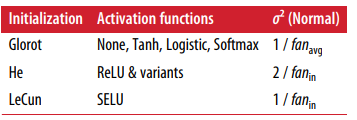

If you want He initialization with a uniform distribution, but based on fanavg rather than fanin, you can use the VarianceScaling initializer like this:

## Nonsaturating activation functions
- Leaky RELU: max(αz, z) where α is the leak parameter. This prevents dying neurons because if x < 0 then the funcion is not zero.
- parametric leaky ReLU: instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter. This was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.
- exponential linear unit (ELU): | α exp z − 1 if z < 0 AND z if z ≥ 0 | -  slower to compute than the ReLU and its variants but during training this is compensated by the faster convergence rate
- SELU: “Self-Normalizing Neural Networks” a scaled version of the ELU activation function, as its name suggests), then the network will self-normalize: the output of each layer will tend to preserve mean 0 and standard deviation 1 during training, which solves the vanishing/exploding gradients problem. But 1. input features must be standardized (mean 0 and standard deviation 1) 2. Every hidden layer’s weights must also be initialized using LeCun normal initialization. In Keras, this means setting kernel_initializer="lecun_normal". 3. The network’s architecture must be sequential. (no recurrent nets)


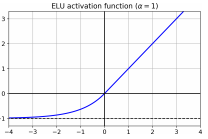

In general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic. If the network’s architecture prevents it from selfnormalizing, then ELU may perform better than SELU (since SELU
is not smooth at z = 0). If you care a lot about runtime latency, then
you may prefer leaky ReLU. If you don’t want to tweak yet another
hyperparameter, you may just use the default α values used by
Keras (e.g., 0.3 for the leaky ReLU). If you have spare time and
computing power, you can use cross-validation to evaluate other
activation functions, in particular RReLU if your network is overfitting, or PReLU if you have a huge training set

### Batch Normalization
The technique consists of adding an operation in the model just before or after the
activation function of each hidden layer, simply zero-centering and normalizing each
input, then scaling and shifting the result using two new parameter vectors per layer:
one for scaling, the other for shifting. In other words, this operation lets the model
learn the optimal scale and mean of each of the layer’s inputs. In many cases, if you
add a BN layer as the very first layer of your neural network, you do not need to
standardize your training set (e.g., using a StandardScaler): the BN layer will do it
for you (well, approximately, since it only looks at one batch at a time, and it can also
rescale and shift each input feature).

In [ ]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])


The authors of the BN paper argued in favor of adding the BN layers before the activation functions, rather than after (as we just did). There is some debate about this, as
it seems to depend on the task. So that’s one more thing you can experiment with to
see which option works best on your dataset. To add the BN layers before the activation functions, we must remove the activation function from the hidden layers, and
add them as separate layers after the BN layers. Moreover, since a Batch Normalization layer includes one offset parameter per input, you can remove the bias term from
the previous layer (just pass use_bias=False when creating it):

In [ ]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
 keras.layers.BatchNormalization(),
 keras.layers.Activation("elu"),
 keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
 keras.layers.Activation("elu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

Another important hyperparameter is axis: it determines which axis should be normalized. It defaults to –1, meaning that by default it will normalize the last axis (using
the means and standard deviations computed across the other axes). For example,
when the input batch is 2D (i.e., the batch shape is [batch size, features]), this means
that each input feature will be normalized based on the mean and standard deviation
computed across all the instances in the batch. For example, the first BN layer in the
previous code example will independently normalize (and rescale and shift) each of
the 784 input features. However, if we move the first BN layer before the Flatten
layer, then the input batches will be 3D, with shape [batch size, height, width], there‐
fore the BN layer will compute 28 means and 28 standard deviations (one per column
of pixels, computed across all instances in the batch, and all rows in the column), and
it will normalize all pixels in a given column using the same mean and standard devi‐
ation. There will also be just 28 scale parameters and 28 shift parameters. If instead
you still want to treat each of the 784 pixels independently, then you should set
axis=[1, 2].

## Gradient Clipping
Another popular technique to lessen the exploding gradients problem is to simply
clip the gradients during backpropagation so that they never exceed some threshold.

 If you want to ensure that Gradient Clipping does not change
the direction of the gradient vector, you should clip by norm by setting clipnorm
instead of clipvalue. This will clip the whole gradient if its ℓ2
 norm is greater than
the threshold you picked. 

# Optimezers

#### Momentum optimization
Momentum optimization cares a great deal about what previous gradients were: at
each iteration, it subtracts the local gradient from the momentum vector m (multiplied by the learning rate η), and it updates the weights by simply adding this momentum vector. To simulate some sort of friction mechanism and prevent the
momentum from growing too large, the algorithm introduces a new hyperparameter
β, simply called the momentum, which must be set between 0 (high friction) and 1
(no friction). A typical momentum value is 0.9.


In [ ]:
# to us it just use the momentum hyperparameter
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

#### Nesterov Accelerated Gradien
The idea is to measure the gradient of the cost function not at the local position but slightly ahead in the direction of the momentum (see Equation 11-5). The only difference from vanilla
Momentum optimization is that the gradient is measured at θ + βm rather than at θ

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

#### AdaGrad
 scaling down the gradient vector along the steepest dimensions. In short, this algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an adaptive learning rate.
It helps point the resulting updates more directly toward the global optimum 

#### RMSProp
accumulating only the gradients from the most recent iterations (as opposed to all the gradients since the begin‐
ning of training). It does so by using exponential decay in the first step

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

#### ADAM and Nadam optimizer
adaptive moment estimation, combines the ideas of Momentum optimization and RMSProp: just like Momentum optimization it keeps track of an exponentially decaying average of past gradients, and just like RMSProp it keeps
track of an exponentially decaying average of past squared gradients

Nadam optimization18 is more important: it is simply Adam optimization plus
the Nesterov trick, so it will often converge slightly faster than Adam. 

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Regulization
Dropout

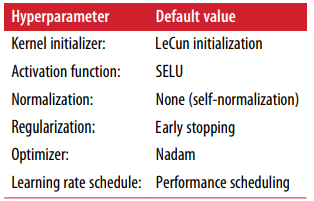

## Neural network transfering


In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])